<div class="alert alert-warning">
    <h1 style="text-align:center; font-family: Chalkduster; font-variant: small-caps; font-size: xx-large; font-weight: bold;">The Quantum Café: A Tale of Code and Intrigue &#x1F52E</h1>
</div>
<div style="text-align: center">
    <pre style="color: darkblue; font-weight: bold; padding: 2em" class="alert alert-info">
                                            ####   
     #########                            ##    ## 
    ####   ###                           ##      ##
    ###    ######################        ##########
    ####   ###     ##  ##  ##  ##        ####  ####
     #########             ##            ####  ####
                                         ##########
</pre>
</div>

---

# Index

1. [Crossword](#PART-1)
2. [Message Teleportation](#PART-2)
3. [Quantum key](#PART-3)
4. [Resources](#RESOURCES)

In [2]:
#!pip install qiskit

import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, transpile, execute, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info import Statevector, random_statevector
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit_textbook.tools import vector2latex
from random import *

# comment this if you are not using IBM Quantum
provider = IBMQ.load_account()

/tmp/ipykernel_60/82326398.py:16: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


## PART 1

<div class="alert alert-warning" style="font-size: larger; text-align: justify;">
    <img src="crossword.png" style="width:50%; margin-left:20px; float: right">
    In the heart of a bustling city, a teenage girl named Maya worked in a small café. Despite her mundane job, she had a passion for science and dreamed of becoming a quantum physicist.
    <br><br>
    One day, while working her shift, she noticed a strange man sitting in the corner. He wore a black suit and had a briefcase by his side. Maya couldn't shake the feeling that he was up to something.
    <br><br>
    The man left the café, but not before dropping a small piece of paper on the floor. Maya picked it up, examining it closely. She realized that the crossword might contain a clue to something important, so she quickly got to work solving it. As she filled in the blanks, she noticed that certain letters seemed to be forming a word...
</div>

<div class="alert alert-info" style="font-size: larger; text-align: justify;">
<p style="font-weight: bold;">Task 1:</p>
Help Maya with her task, she needs to use her knowledge of quantum physics and computing to solve the mysterious crossword.
</div>

<img src="crossword_solution.png" style="width:50%; float: right">
<img src="crossword_hints.png" style="width:50%; float: right">

<div class="alert alert-warning" style="font-size: larger; text-align: justify;">
A few minutes later, Maya had completed the crossword, and several letters stood out: "_ _ _ _ _ _ _ _ _". She realized that the answer to the crossword might lead to a secret door.
</div>

---

## PART 2

<div class="alert alert-warning" style="font-size: larger; text-align: justify;">
<img src="strange_machine.png" style="width:25%; margin-left:20px; float: right">
    After hours of searching, she finally found a fireplace in the other side of the café. She felt around the bricks and found a loose one. Behind the bricks, there was a small room with a table, two chairs, and a strange-looking machine. As she inspected the machine, Maya realized that it was a quantum key distribution device. 
<br><br>
She knew that if it fell into the wrong hands, it could be used to hack into secure systems and steal important information. She had to get the machine out of there and into the hands of someone who could protect it.
<br><br>
Just as she was about to leave the room, the door to the café burst open, and a group of menacing-looking men entered. They were lead by the same men she had seen earlier that day.
<br><br>    
Maya knew that she couldn't take on the bad guys alone. She needed help, and she knew just who to call. She had to use quantum teleportation to contact her friend, a brilliant young quantum physicist named Leon, who had a reputation for being a bit of a maverick.
</div>

<div class="alert alert-info" style="font-size: larger; text-align: justify;">
<p style="font-weight: bold;">Task 2:</p>
Maya has to solve another task. She will use a quantum mechanics to secretly send her message in a form of a quantum state to her friend Leon. Will you help her implement a quantum teleportation algorithm, so that Leon receives her call for help?
</div>

---

In [3]:
def send_message(message: str) -> QuantumCircuit:
    """ Creates a teleportation quantum circuit with 3 qubits and 3 classical bits and sends a given message through classical channels.
    """
    
    qc = QuantumCircuit(3, 3)
    qc.initialize(message_dictionary[message], 2)
    
    qc.h(0)
    qc.cx(0,1)
    qc.barrier()
        
    qc.cx(2,1)
    qc.h(2)
        
    qc.barrier()
    
    qc.measure(1,1)
    qc.measure(2,2)
    
    qc.barrier()
    
    qc.cx(1,0)
    qc.cz(2,0)

    
    qc.barrier()    
    qc.reset(1)
    qc.reset(2)
    
    return qc

# help(send_message)

In [4]:
def receive_message(qc):
    """ Reads a quantum state and returns a corresponding message.
    """
    sim = Aer.get_backend('qasm_simulator')
    qc.save_statevector()
    result = sim.run(qc).result().get_statevector()
    statevec = np.round([result[0].real, result[1].real], 10)
    for key, value in message_dictionary.items():
        value = np.round(value,10)
        if value[0] == statevec[0] and value[1] == statevec[1]:
            return key
    return print("! error ocurred !")

# help(receive_message)

<div class="alert alert-warning" style="font-size: larger; text-align: justify;">
Maya and Leon agreed on common message dictionary with the following messages contained. Feel free to add your own messages to the dictionary, but keep in mind that the value has to be a valid quantum state.
</div>

In [5]:
message_dictionary = {
    "help" : [np.sqrt(3)/np.sqrt(6), np.sqrt(2)/np.sqrt(4)],
    "busy" : [np.sqrt(2)/np.sqrt(3), 1/np.sqrt(3)],
    "coming" : [1/np.sqrt(3), np.sqrt(2)/np.sqrt(3)],
    "yes" : [0,1],
    "no" : [1,0],
    "maybe" : [1/np.sqrt(2), 1/np.sqrt(2)],
}

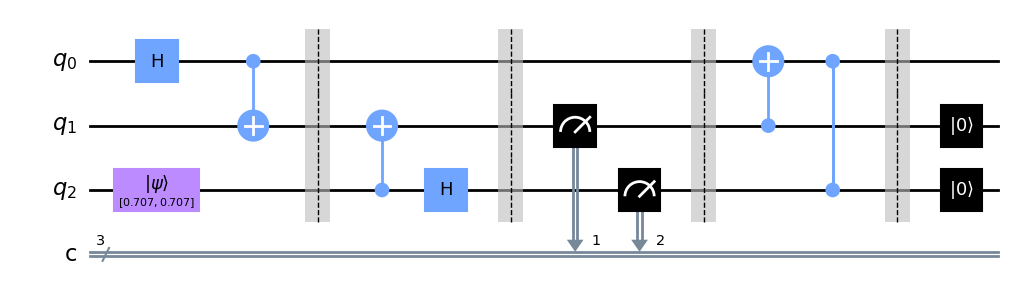

In [6]:
maya = send_message("help")
maya.draw()

In [7]:
receive_message(maya)

'help'

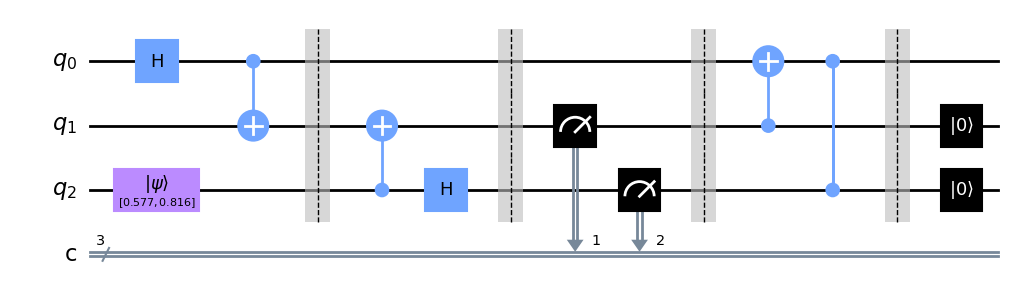

In [8]:
leon = send_message("coming")
leon.draw()

In [9]:
receive_message(leon)

'coming'

---

# PART 3

<div class="alert alert-warning" style="font-size: larger; text-align: justify;">
<img src="card.png" style="width:25%; margin-left:20px; float: right">
Leon arrived quickly, and after examining the machine, he confirmed Maya's suspicions. It was indeed a quantum key distribution device, and it was worth millions on the black market. Leon knew that they had to get it out of there as quickly as possible. But the bad guys were hot on their trail, and Maya and Leon had to act fast.
<br><br>
They decided to use a storage unit in a remote location that Maya had rented previously.
<br><br>
But they couldn't just use a regular lock and key to secure the machine, they needed something more advanced. Maya remembered learning about quantum locks and keys in her physics class, and thought this would be the perfect opportunity to put her knowledge to the test.
<br><br>
She quickly got to work, programming a quantum lock that could only be opened with a specific key. With the help of Leon, they attached the lock to the storage unit where they had secured the quantum key distribution device.
<br><br>
With the machine safely hidden, Maya and Leon could breathe a sigh of relief. They had narrowly escaped the bad guys and saved the quantum key distribution device from falling into the wrong hands.
</div>

<div class="alert alert-info" style="font-size: larger; text-align: justify;">
<p style="font-weight: bold;">Task 3:</p>
Help Maya and Leon to create a quantum lock and key to make sure that the machine is in a safe place. Security on the first place, now it's your turn to test it out.
</div>

In [10]:
def key(key_length: int) -> str:
    """Creates a classical key that will be used for unlocking a quantum lock.
    """
    key = ""
    for i in range(key_length):
        key += str(randint(0,1))
    return key

# help(key)

In [11]:
def lock(key_length: int) -> str:
    """Creates a quantum lock to be opened with our custom key.
    """
    qc = QuantumCircuit(key_length * 2, key_length)

    for i in range(key_length):
        qc.h(i)
        qc.cx(i, key_length + i)
        qc.measure(key_length + i, i)

    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qc, simulator, shots=1).result()
    counts = result.get_counts()
    
    res = [key for key in counts.keys()][0]
    
    return res

# help(lock)

In [12]:
def open_the_door(key: str, lock: str) -> bool:
    """Decides whether the provided key opens the given lock.
    """
    print("Key:", key, "Lock:", lock)
    for i in range(key_length):
        if key[i] == lock[i]:
            return print("Upps, it didn't work...")
    return print("Hurray, it worked!")

# help(open_the_door)

In [13]:
key_length = 3

<div class="alert alert-warning" style="font-size: larger; text-align: justify;">
You got 3 attempts, would you be able to help our friends and unlock the lock?
</div>

In [17]:
# ATTEMPT 1
open_the_door(key(key_length), lock(key_length))

Key: 100 Lock: 000
Upps, it didn't work...


In [18]:
# ATTEMPT 2
open_the_door(key(key_length), lock(key_length))

Key: 110 Lock: 010
Upps, it didn't work...


In [19]:
# ATTEMPT 3
open_the_door(key(key_length), lock(key_length))

Key: 011 Lock: 100
Hurray, it worked!


<div class="alert alert-warning" style="font-size: larger; text-align: justify;">
<img src="symbols.png" style="width:40%; margin-left:20px; float: right;">
Maya and Leon have successfully tested their quantum lock and key. As they walked away, Maya couldn't help but feel proud of what she had accomplished. She had solved a crossword puzzle, discovered a hidden door, and saved a valuable piece of technology. And who knows? Maybe one day she would become the quantum physicist she had always dreamed of being.
<br><br>
The next day, the news broke that a group of criminals had been apprehended for attempting to steal a quantum key distribution device. Maya and Leon knew that they had played a small part in saving the world from a major security breach.
<br><br>
From that day on, Maya and Leon continued to work together on their quantum adventures, using their knowledge and skills to make the world a safer place.
</div>

---

# RESOURCES

* ChatGPT, OpenAI
* Generative AIs: Dream AI, Bluewillow
* QxQ course, lectures, labs
* past experience, internships
* Jupyter notebooks, IBM Quantum
* Google search, my imagination

---
# 
*<div align="right">by Denča, 2023</div>*